### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


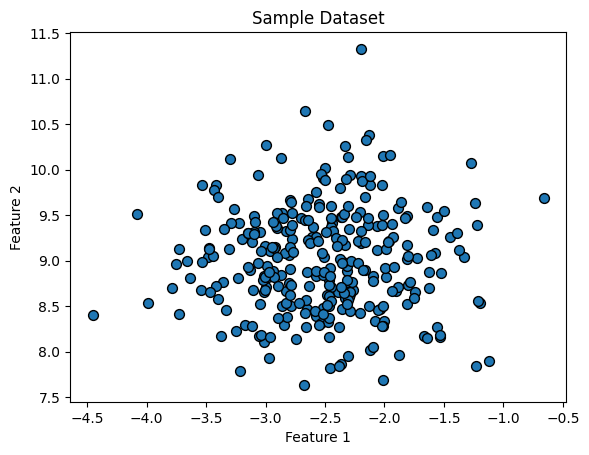

In [8]:
%pip install scikit-learn

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=50)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import IsolationForest

# Load the dataset
data = fetch_california_housing()
X = data.data  # Features

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the dataset
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [10]:
anomaly_labels = iso_forest.predict(X)

import numpy as np

# Count the number of anomalies and normal points
unique, counts = np.unique(anomaly_labels, return_counts=True)
anomaly_summary = dict(zip(unique, counts))

# Display results
print("Anomaly Detection Summary:")
print(f"Normal points (1): {anomaly_summary.get(1, 0)}")
print(f"Anomalies (-1): {anomaly_summary.get(-1, 0)}")

Anomaly Detection Summary:
Normal points (1): 19608
Anomalies (-1): 1032


### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

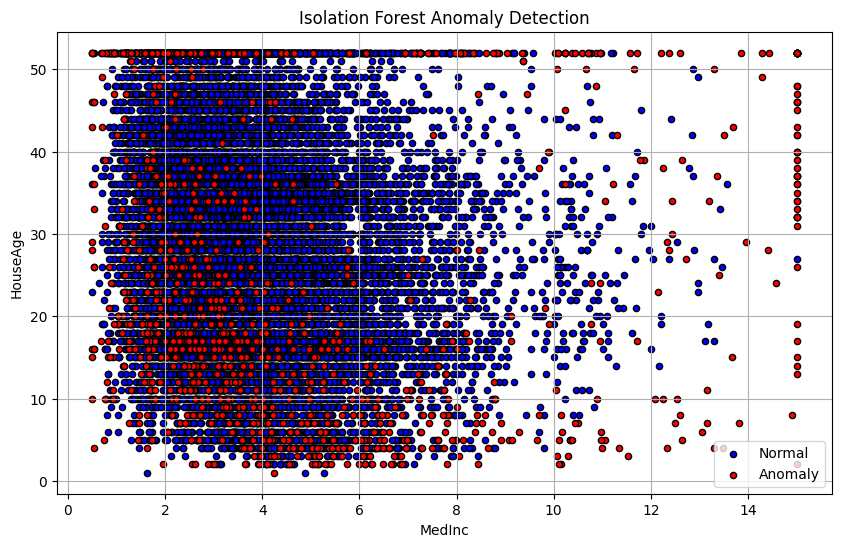

In [11]:
import matplotlib.pyplot as plt

# Use only the first two features for visualization
x_vals = X[:, 0]
y_vals = X[:, 1]

# Anomaly mask
anomalies = anomaly_labels == -1
normals = anomaly_labels == 1

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_vals[normals], y_vals[normals], c='blue', label='Normal', s=20, edgecolor='k')
plt.scatter(x_vals[anomalies], y_vals[anomalies], c='red', label='Anomaly', s=20, edgecolor='k')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.grid(True)
plt.show()

### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

In [12]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Try multiple contamination levels
contamination_levels = [0.01, 0.05, 0.1, 0.2]

for level in contamination_levels:
    print(f"\nContamination level: {level}")
    
    # Initialize and fit the model
    iso_forest = IsolationForest(contamination=level, random_state=42)
    iso_forest.fit(X)
    
    # Predict anomalies
    preds = iso_forest.predict(X)
    
    # Count anomalies
    unique, counts = np.unique(preds, return_counts=True)
    anomaly_summary = dict(zip(unique, counts))
    
    print(f"Normal points (1): {anomaly_summary.get(1, 0)}")
    print(f"Anomalies (-1): {anomaly_summary.get(-1, 0)}")


Contamination level: 0.01
Normal points (1): 20433
Anomalies (-1): 207

Contamination level: 0.05
Normal points (1): 19608
Anomalies (-1): 1032

Contamination level: 0.1
Normal points (1): 18576
Anomalies (-1): 2064

Contamination level: 0.2
Normal points (1): 16512
Anomalies (-1): 4128
